---

<center>

# **Non-paraxial properties of a partially coherent field diffracted by a grating**

**Made by:**

Samuel Huertas Rojas

</center>

---

In [1]:
# Importar la librerias necesarias
# import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# from abc import ABC, abstractmethod


# from itertools import product


# Rectificar las versiones de las librerias
!python --version
print("NumPy", np.__version__)
print("Matplotlib", mpl.__version__)
print("Seaborn", sns.__version__)
print("Pandas", pd.__version__)

Python 3.12.6
NumPy 2.2.4
Matplotlib 3.10.1
Seaborn 0.13.2
Pandas 2.2.3


## Definiciones previas

* Difracción: fenómeno que ocurre cuando las ondas de luz encuentran un obstáculo o pasan a través de una abertura estrecha, haciendo que la luz se desvíe y se propague en diferentes direcciones. 

* Coherencia: Se dice que dos puntos de una onda son coherentes cuando guardan una relación de fase constante, es decir, cuando conocido el valor instantáneo del campo eléctrico en uno de los puntos, es posible predecir el del otro. 

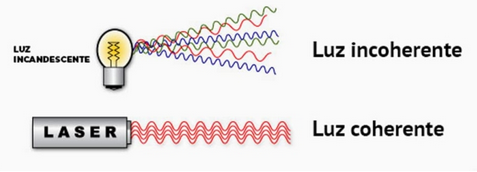

# Definición del kernel no-paraxial

<center>

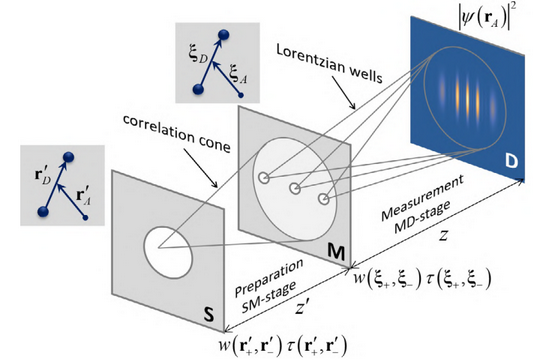

</center>

Como los detectores solo pueden registrar valores reales y positivos, esto es: <br>
<center>

$|\Psi(\vec{r})|^{2} = \Psi(\vec{r}) \Psi(\vec{r})^{*}$

</center>


El patrón que va a registrar el detector de modulo cuadrado dispuesto en el plano D va a ser:<br>
<center>

$
|\psi(\mathbf{r}_A)|^2 =
\int_E \int_E d^2 \xi_A \, d^2 \xi_D \,
\omega(\xi_+, \xi_-)\,
\tau(\xi_+, \xi_-)\,
\Phi(\xi_+, \xi_-, \mathbf{r}_A, \mathbf{z}, k)
$

</center>

Tenemos que la función que define el kernel no-local es: <br>

<center>

$\Phi(\xi_+, \xi_-, \mathbf{r}_A, \mathbf{z}, k) =
\left( \frac{k}{4\pi} \right)^2
\left( \frac{z + |\mathbf{z} + \mathbf{r}_A - \xi_+|}{|\mathbf{z} + \mathbf{r}_A - \xi_+|^2} \right)
\left( \frac{z + |\mathbf{z} + \mathbf{r}_A - \xi_-|}{|\mathbf{z} + \mathbf{r}_A - \xi_-|^2} \right)
\times \exp\!\big( i k |\mathbf{z} + \mathbf{r}_A - \xi_+| - i k |\mathbf{z} + \mathbf{r}_A - \xi_-| \big)$ 

</center>

In [ ]:
class KernelNoParaxial:
    def __init__(
        self,
        longitud_de_onda,  # longitud de onda
        distancia_planos,  # distancia entre los planos de la rejilla y el detector
        coordenada_detector_x,  # coordenada x en el plano del dectector
        coordenada_detector_y,  # coordenada y en el plano del detector
        eta_mas_x,  # coordenadas reducidas en el plano de la rejilla -> eje x,+
        eta_mas_y,  # coordenadas reducidas en el plano de la rejilla -> eje y,+
        eta_menos_x,  # coordenadas reducidas en el plano de la rejilla -> eje x,-
        eta_menos_y,  # coordenadas reducidas en el plano de la rejilla -> eje y,-
    ):
        self.longitud_de_onda = longitud_de_onda
        self.distancia_planos = distancia_planos
        self.coordenada_detector_x = coordenada_detector_x
        self.coordenada_detector_y = coordenada_detector_y
        self.eta_mas_x = eta_mas_x
        self.eta_mas_y = eta_mas_y
        self.eta_menos_x = eta_menos_x
        self.eta_menos_y = eta_menos_y

    def calc_kernelNoParaxial(self):
        """
        Función para calcular el kernél no-paraxial de un sistema P&M, el cual consiste en un plano en z0 en donde se encuentra la máscara o rejilla (eta_mas y eta_menos) y un plano en z1 en donde se encuentra un detector (x, y). Dicho calculo solo toma la parte real del kernel.
        Args:
        - None
        Return:
        - Cálculo del kernel no-paraxial, s un mapeo de cómo se distribuye la energía en el espacio.
        """
        termino1 = (
            1 / 2 * self.longitud_de_onda**2
        )  # Esta represetna (k/4*pi)**2, donde k => 2*pi/longitud_de_onda
        termino2 = (
            self.distancia_planos
            + np.sqrt(
                self.distancia_planos**2
                + (self.coordenada_detector_x - self.eta_mas_x) ** 2
                + (self.coordenada_detector_y - self.eta_mas_y) ** 2
            )
        ) / (
            self.distancia_planos**2
            + (self.coordenada_detector_x - self.eta_mas_x) ** 2
            + (self.coordenada_detector_y - self.eta_mas_y) ** 2
        )
        termino3 = (
            self.distancia_planos
            + np.sqrt(
                self.distancia_planos**2
                + (self.coordenada_detector_x - self.eta_menos_x) ** 2
                + (self.coordenada_detector_y - self.eta_menos_y) ** 2
            )
        ) / (
            self.distancia_planos**2
            + (self.coordenada_detector_x - self.eta_menos_x) ** 2
            + (self.coordenada_detector_y - self.eta_menos_y) ** 2
        )
        termino4 = np.cos(
            (2 * np.pi / self.longitud_de_onda)
            * (
                np.sqrt(
                    self.distancia_planos**2
                    + (self.coordenada_detector_x - self.eta_mas_x) ** 2
                    + (self.coordenada_detector_y - self.eta_mas_y) ** 2
                )
                - np.sqrt(
                    self.distancia_planos**2
                    + (self.coordenada_detector_x - self.eta_menos_x) ** 2
                    + (self.coordenada_detector_y - self.eta_menos_y) ** 2
                )
            )
        )

        resultado = termino1 * termino2 * termino3 * termino4

        return resultado


Funcion de transmición local:<br>
<center>

$t(\xi) = \begin{cases}
1, & \text{si } -(\frac{b}{2} + a) \le \xi \le -\frac{b}{2},\\
1, & \text{si } \frac{b}{2} \le x \le (\frac{b}{2} + a),\\
0, & \text{en otros casos }.
\end{cases}$

</center>

Está función se centra en la geometria de la rendija.

In [12]:
class FuncionTransmisionLocal:
    def __init__(
        self,
        eta_x,  # Coordenadas en el plano de la rejilla -> eje x
        eta_y,  # Coordenadas en el plano de la rejilla -> eje y
    ):
        self.eta_x = eta_x
        self.eta_y = eta_y

    def transmision_rendijas_cuadradas_pares(
        self,
        ancho: float,  # Ancho de las rendijas
        separacion: float,  # Separación entre las rendijas
        numero_rendijas: int,  # Número de rendijas
    ):
        """
        Función que define la transmisión del sistema para una rejilla de rendijas cuadradas para un número par de rendijas, las cuales van a tener un eje de simetría en el origen.
        Args:
        - ancho(float): Ancho de las rendijas
        - separacion(float): Separación entre las rendijas
        - numero_rendijas(int): Número de rendijas (Par)
        Return:
        - Cálculo de la función de transmisión del sistema.
        """
        if numero_rendijas % 2 != 0:
            raise ValueError("El número de rendijas debe ser par.")
        else:
            condicion = np.zeros_like(self.eta_x, dtype=bool)
            for n in range(1, numero_rendijas // 2 + 1):
                condicion |= (
                    -((2 * n - 1) * (separacion / 2) + n * ancho) <= self.eta_x
                ) & (
                    self.eta_x <= -((2 * n - 1) * (separacion / 2) + (n - 1) * ancho)
                ) | (
                    ((2 * n - 1) * (separacion / 2) + (n - 1) * ancho) <= self.eta_x
                ) & (self.eta_x <= (2 * n - 1) * (separacion / 2) + n * ancho)
            return np.where(condicion, 1, 0)

Para la función de la transmisión no-local: <br>
<center>

$ \tau(\xi_{+}, \xi_{-}) = t(\xi_{+})t^{*}(\xi_{-})$

</center>

Siendo $t(x)$ la función de transmisión, se centra en los pares de la cavidad

In [8]:
class FuncionNoLocalidad:
    def __init__(
        self,
        eta_mas_x,  # Coordenadas en el plano de la rejilla -> eje x,+
        # eta_mas_y,  # Coordenadas en el plano de la rejilla -> eje y,+
        eta_menos_x,  # Coordenadas en el plano de la rejilla -> eje x,-
        # eta_menos_y,  # Coordenadas en el plano de la rejilla -> eje y,-
    ):
        self.eta_mas_x = eta_mas_x
        # self.eta_mas_y = eta_mas_y
        self.eta_menos_x = eta_menos_x
        # self.eta_menos_y = eta_menos_y
        pass

    def convolucion(self):
        convolucion = np.convolve(self.eta_mas_x, self.eta_menos_x, mode="same")

        return convolucion

Para la función de no-localidad: <br>
<center>

$w(\xi_+,\xi_-) = \Psi(\xi_+) \Psi^{*}(\xi_{-})$

</center>

Está función de no-localidad es donde se definen las propiedades físicas y estadísticas de la fuente, o sea que es donde se va a definir si la fuente es coherente o incoherente, y distribución del haz. Esta función se encarga de activar o desactivar los modos de propagación del kernel no-local, los cuales corresponden a las parejes de puntos en el plano de la rejilla. <br>

Para definir la función de no-localidad se debe de seguir: <br>
<center>

$\Psi(\xi_+) \Psi^{*}(\xi_{-}) = \mu(\xi_+,\xi_{-}) |\Psi(\xi_+)|^2 |\Psi(\xi_-)|^2$

</center>

En donde: 

* $|\Psi(\xi_{\pm})|^2 = A_0 exp(- \frac{|\xi_{\pm}|^2}{2 \sigma_I^2})$: la cual representa el perfil de intensidad, en este caso es Gaussiano el cual $\sigma_I$ es la desviación estandar y nos dice que tan ancho es la gaussiana.
* $\mu(\xi_+,\xi_{-})$: es el perfil de la coherencia, en este caso es un perfil Gaussiano el cual varia de $0 \leq \mu(\xi_+,\xi_{-}) \leq 1$, su forma mátematica es: <br>

<center>

$\mu(\xi_+,\xi_{-}) = exp(-\frac{|\xi_+ - \xi_-|^2}{2\sigma_{C}^2})$

</center>

In [4]:
# CLase que define la coherencia del sistema, la cual tiene un perfil gaussiano sin correlación.
class FuncionCoherencia:
    def __init__(
        self,
        eta_mas_x,  # Coordenadas en el plano de la rejilla -> eje x,+
        eta_mas_y,  # Coordenadas en el plano de la rejilla -> eje y,+
        eta_menos_x,  # Coordenadas en el plano de la rejilla -> eje x,-
        eta_menos_y,  # Coordenadas en el plano de la rejilla -> eje y,-
    ):
        self.eta_mas_x = eta_mas_x
        self.eta_mas_y = eta_mas_y
        self.eta_menos_x = eta_menos_x
        self.eta_menos_y = eta_menos_y

    def coherencia_gaussiana(self, sigma_c):
        """ "
        Obtener el valor de la función de coherencia gaussiano.
        Args:
        - sigma_c(float): Ancho de la gaussiana en el eje x e y
        Return:
        - Cálculo de la función de coherencia gaussiano.
        """
        termino = np.exp(
            -(
                (self.eta_mas_x - self.eta_menos_x) ** 2
                + (self.eta_mas_y - self.eta_menos_y) ** 2
            )
            / (2 * sigma_c**2)
        )
        return termino


class FuncionPerfilIntensidad:
    def __init__(
        self,
        eta_x,  # coordenadas en el plano de la rejilla -> eje x
        eta_y,  # coordenadas en el plano de la rejilla -> eje y
    ):
        self.eta_x = eta_x
        self.eta_y = eta_y

    def intencidad_gaussiana(self, amplitud_0, sigma_I):
        """ "
        Obtener el valor de la función de la intensidad con un perfil gaussiano.
        Args:
        - sigma_I(float): Ancho de la gaussiana en el eje x e y
        - amplitud_0(float): Amplitud inicial de la gaussiana
        Return:
        - Cálculo de la función de la intensidad.
        """
        termino = amplitud_0 * np.exp(
            -((self.eta_x) ** 2 + (self.eta_y) ** 2) / (2 * sigma_I**2)
        )
        return termino

## Rectificación de las funciones

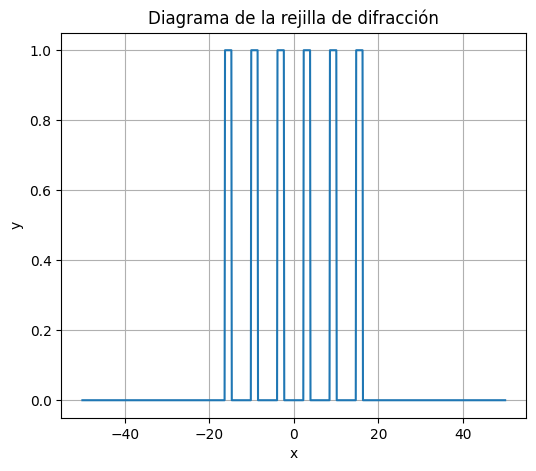

In [18]:
lon_onda = 1.55
x = np.linspace(-50, 50, 1000)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)
sigma = 1
mu = 2

ancho_rejilla = 1*lon_onda
separacion_rejilla = 3*lon_onda

rejilla = FuncionTransmisionLocal(
    eta_x=x, 
    eta_y=y
).transmision_rendijas_cuadradas_pares(ancho=ancho_rejilla, separacion=separacion_rejilla, numero_rendijas=6)

plt.figure(figsize=(6, 5))
plt.plot(x, rejilla)
plt.title("Diagrama de la rejilla de difracción")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

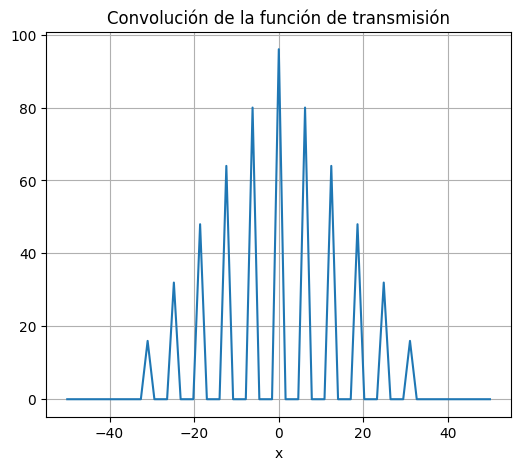

In [19]:
# Convolución de la función de transmisión
transmision = FuncionNoLocalidad(
    eta_mas_x=rejilla,
    eta_menos_x=rejilla,
).convolucion()

plt.figure(figsize=(6, 5))
plt.plot(x, transmision)
plt.title("Convolución de la función de transmisión")
plt.xlabel("x")
plt.grid()
plt.show()

## Cálculo de la intensidad

In [20]:
# Cálculo del kernel no-paraxial
kernel = KernelNoParaxial(
    longitud_de_onda=lon_onda,
    distancia_planos=10*lon_onda,
    coordenada_detector_x=x,
    coordenada_detector_y=y,
    eta_mas_x=xx,
    eta_mas_y=yy,
    eta_menos_x=xx,
    eta_menos_y=yy,
).calc_kernelNoParaxial()

# Definición de la rejilla de difracción
rejilla = FuncionTransmisionLocal(
    eta_x=x, 
    eta_y=y
).transmision_rendijas_cuadradas_pares(ancho=ancho_rejilla, separacion=separacion_rejilla, numero_rendijas=4)

# Definición de la función de transmisión del sistema
funcion_transmision = FuncionNoLocalidad(
    eta_mas_x=rejilla,
    eta_menos_x=rejilla,
).convolucion()

# Definición de la función de coherencia del sistema
coherencia = FuncionCoherencia(
    eta_mas_x=xx,
    eta_mas_y=yy,
    eta_menos_x=xx,
    eta_menos_y=yy,
).coherencia_gaussiana(sigma_c=sigma)

# Definición del perfil de intensidad del sistema
perfil_intensidad = FuncionPerfilIntensidad(
    eta_x=xx,
    eta_y=yy,
).intencidad_gaussiana(amplitud_0=mu, sigma_I=sigma)



NameError: name 'KernelNoParaxial' is not defined